# Load Youtube Data Task Statistics

In [1]:
import pandas as pd

df = pd.read_csv("youtube.csv")
df.head(5)

,rootID,|V|,|E|,max_deg,avg_deg,core_number(depth),deg1,deg2,deg3,deg4,...,core2,core3,core4,core5,core6,core7,core8,core9,core10,time(ms)
0,18880,578,12965,249,22.430,29,249,231,194,167,...,29,29,29,29,29,29,29,29,29,48.0
1,5456,3046,87294,1353,28.660,49,1353,1136,1123,1107,...,49,49,49,49,49,49,49,49,49,2195.0
2,5152,1285,31185,526,24.270,33,526,473,360,354,...,33,33,33,33,33,33,33,33,33,177.0
3,9728,1638,36634,601,22.365,31,601,470,431,415,...,31,31,31,31,31,31,31,31,31,267.0
4,7376,1003,25293,541,25.215,38,541,389,384,384,...,38,38,38,38,38,38,38,38,38,113.0


# Sort by Time

In [2]:
df.sort_values("time(ms)", inplace=True)
df.tail(10)

,rootID,|V|,|E|,max_deg,avg_deg,core_number(depth),deg1,deg2,deg3,deg4,...,core2,core3,core4,core5,core6,core7,core8,core9,core10,time(ms)
2388,19195,2570,72678,1583,28.280,43,1583,684,660,555,...,43,43,43,43,43,43,43,43,43,13033.0
1581,19786,3588,82727,1417,23.055,37,1417,1012,691,671,...,37,37,37,37,37,37,37,37,37,13407.0
4553,17345,3228,100177,2127,31.035,49,2127,759,671,653,...,49,49,49,49,49,49,49,49,49,13623.0
9727,19107,2646,75747,1646,28.625,44,1646,692,657,565,...,44,44,44,44,44,44,44,44,44,13893.0
12942,19366,2755,78375,1597,28.450,45,1597,934,853,566,...,45,45,45,45,45,45,45,45,45,15011.0
556,15056,5074,162249,2721,31.975,50,2721,1546,890,840,...,50,50,50,50,50,50,50,50,50,15015.0
11756,18725,3177,101008,1850,31.795,49,1850,1059,978,672,...,49,49,49,49,49,49,49,49,49,15267.0
10739,19780,2321,55094,1320,23.735,38,1320,645,597,532,...,38,38,38,38,38,38,38,38,38,15584.0
4096,18892,3723,113828,1849,30.575,46,1849,1303,831,719,...,46,46,46,46,46,46,46,46,46,16881.0
628,0,26235,694686,7105,26.480,51,7105,5544,2393,2159,...,51,51,51,51,51,51,51,51,51,3645905.0


# |V| v.s. Time Plot

In [3]:
import numpy as np

x = np.array(df['|V|'])
y = np.array(df['time(ms)'])

### Ratio of {Total Time by All Tasks} / {Time of the Most Expensive Task}

In [4]:
np.sum(y)/np.max(y)

5.513795340251598

In [5]:
x = x[:-1]
y = y[:-1]

### Kick out the last point which is an outlier that is on the far upper-right corner

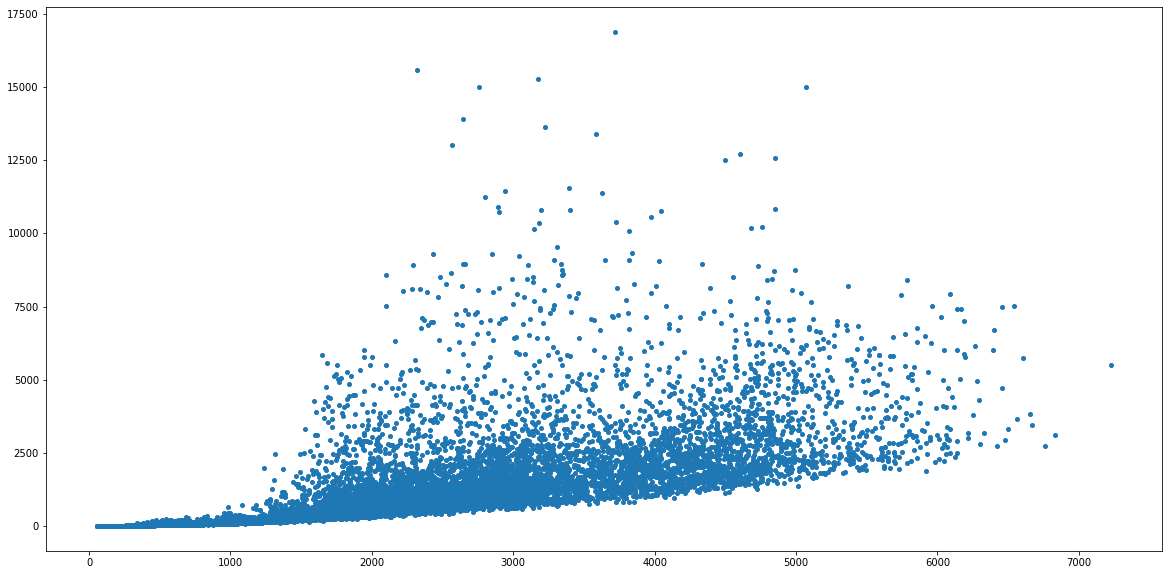

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.scatter(x, y, s=16)

# |E| v.s. Time Plot

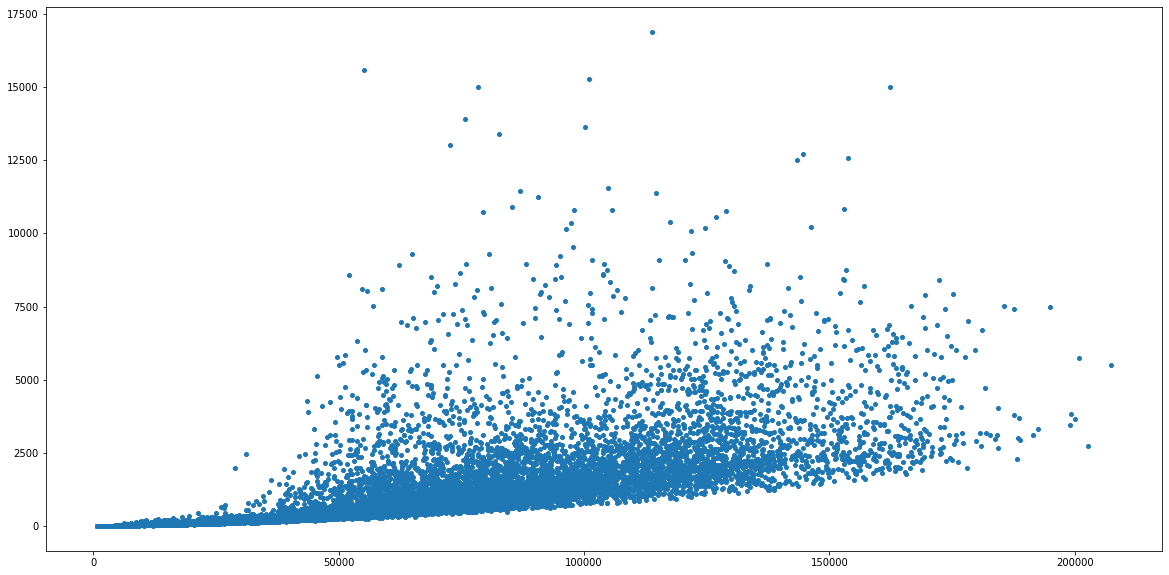

In [7]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array(df['|E|'])
y = np.array(df['time(ms)'])

x = x[:-1]
y = y[:-1]

plt.figure(figsize=(20,10))
plt.scatter(x, y, s=16)

# max_deg v.s. Time Plot

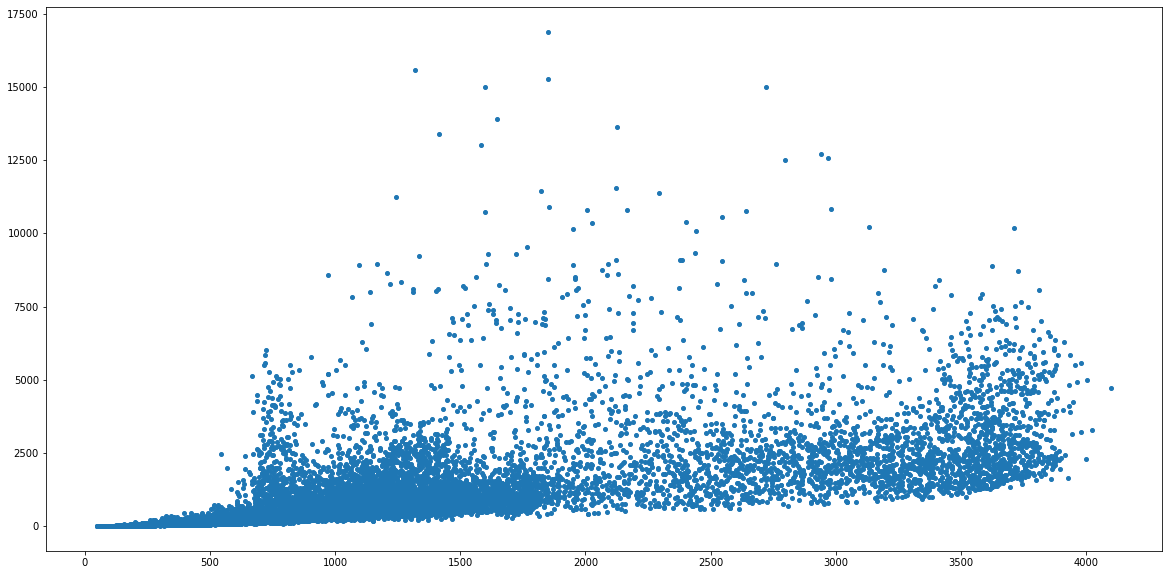

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array(df['max_deg'])
y = np.array(df['time(ms)'])

x = x[:-1]
y = y[:-1]

plt.figure(figsize=(20,10))
plt.scatter(x, y, s=16)

# avg_deg v.s. Time Plot

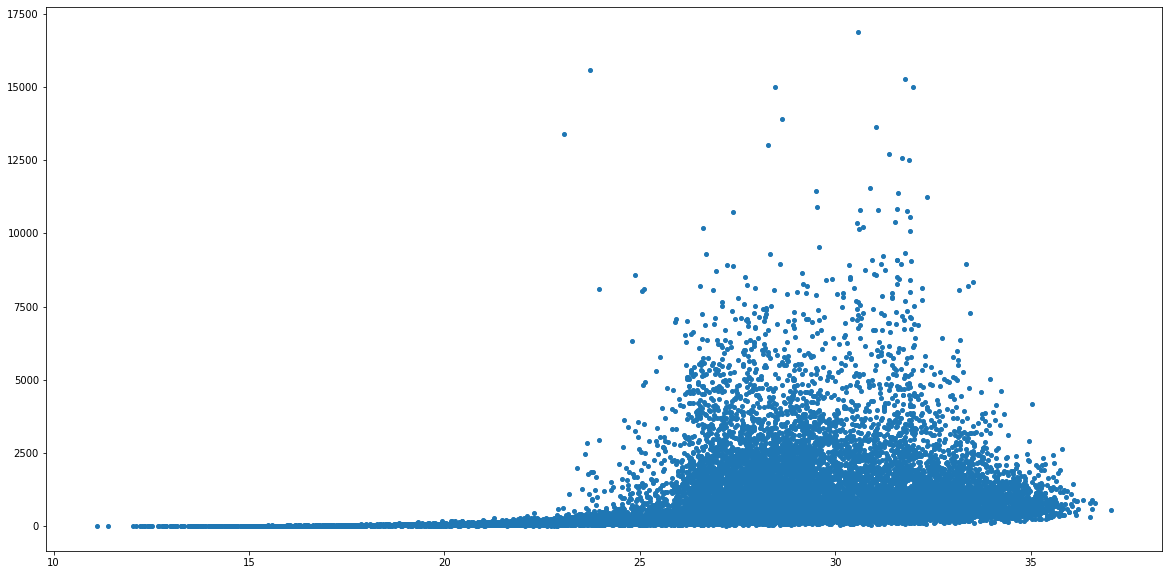

In [9]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array(df['avg_deg'])
y = np.array(df['time(ms)'])

x = x[:-1]
y = y[:-1]

plt.figure(figsize=(20,10))
plt.scatter(x, y, s=16)

# core_number(depth) v.s. Time Plot

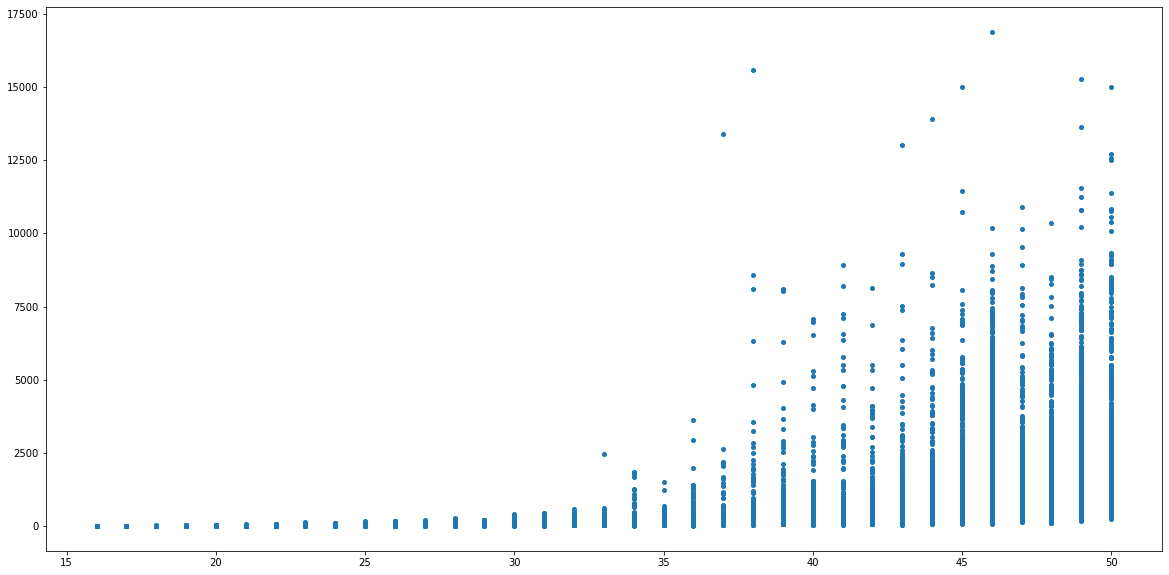

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array(df['core_number(depth)'])
y = np.array(df['time(ms)'])

x = x[:-1]
y = y[:-1]

plt.figure(figsize=(20,10))
plt.scatter(x, y, s=16)

# SVM Regression over All Features

In [11]:
X = np.array(df)

We use all data for training, and simply check if the training error is small;
if this is not the case, it won't generalize to test data unseen before

In [12]:
X_train = X[:, 1:-1] # 0 is rootID (spawning vertex)
y_train = X[:, -1]

In [13]:
%%time

from sklearn.svm import SVR

svr = SVR()

svr.fit(X_train, y_train)
yhat = svr.predict(X_train)

# check the last 10 tasks (sorted by time so 10 most long-running tasks)
list(zip(y_train[-10:], yhat[-10:])) # actual time v.s. predicted time

CPU times: user 23 s, sys: 476 ms, total: 23.4 s
Wall time: 23.5 s


[(13033.0, 899.6699836751646),
 (13407.0, 1128.128814169766),
 (13623.0, 1505.7520049232442),
 (13893.0, 969.0371293259706),
 (15011.0, 1028.7694668972354),
 (15015.0, 1924.4120084717556),
 (15267.0, 1521.7257551041016),
 (15584.0, 529.6051364585),
 (16881.0, 1745.7842374349384),
 (3645905.0, 1015.0806720356019)]